# 1. Exploración de Datos (EDA)

In [1]:
# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import plotly.express as px

# Para reproducibilidad
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)



*   **Nombre del dataset:** Credit Card Fraud Detection
*   **Fuente:** Kaggle
*   **Descripción breve:** Este dataset contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares europeos. El objetivo es detectar transacciones fraudulentas.

In [3]:
# Ruta al archivo en tu Google Drive
file_path = '/content/drive/MyDrive/Colab Notebooks/data/raw/creditcard.csv'

# Carga de datos con manejo de errores
try:
    df = pd.read_csv(file_path)
    print("Datos cargados correctamente. Dimensiones:", df.shape)
except Exception as e:
    print("Error cargando el archivo:", e)

# Mostrar las primeras filas
df.head(10)

Datos cargados correctamente. Dimensiones: (284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


### **¿Cuántas filas y columnas tiene el dataset?, ¿Qué variables hay y de qué tipo son?, ¿Hay valores nulos?**

In [5]:
# Información general
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### **Estadística Descriptiva:** Principales estadísticos de las columnas numéricas

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


### **¿Cuántas transacciones fraudulentas y cuántas legítimas hay?, ¿Qué porcentaje representa cada clase?**

In [7]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))  # Proporción

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


### **Observaciones iniciales importantes**


*   El dataset está muy desbalanceado, dado que las transacciones fraudulentas representan menos del 0.2%
*   Todas las variables son numéricas
*   No hay valores nulos

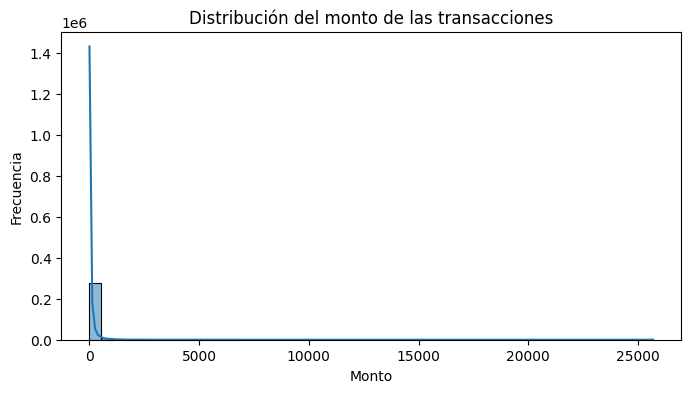

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Distribución del monto de las transacciones')
plt.xlabel('Monto')
plt.ylabel('Frecuencia')
plt.show()

La mayoría de las transacciones tienen montos bajos, con una gran concentración cerca de cero. Sin embargo, hay algunos valores atípicos o extremos correspondientes a transacciones de montos mucho mayores. Esto indica que, aunque la mayoría de compras con tarjeta son por montos pequeños, existen algunas compras significativamente más grandes que podrían requerir atención especial en el análisis.

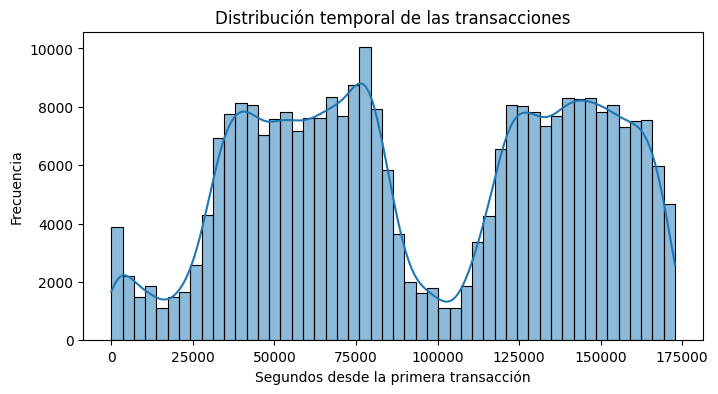

In [10]:
plt.figure(figsize=(8,4))
sns.histplot(df['Time'], bins=50, kde=True)
plt.title('Distribución temporal de las transacciones')
plt.xlabel('Segundos desde la primera transacción')
plt.ylabel('Frecuencia')
plt.show()

Las transacciones están distribuidas de manera relativamente uniforme a lo largo del tiempo registrado en el dataset. No se observan intervalos de tiempo con ausencia de transacciones ni picos evidentes, lo que sugiere que las transacciones se realizaron de manera continua durante el periodo de recolección de los datos.

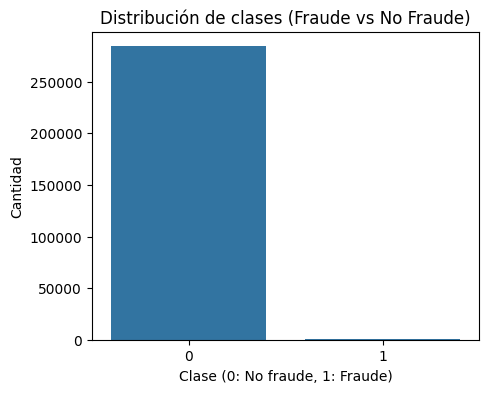

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title('Distribución de clases (Fraude vs No Fraude)')
plt.xlabel('Clase (0: No fraude, 1: Fraude)')
plt.ylabel('Cantidad')
plt.show()

In [12]:
fraud_percent = df['Class'].mean() * 100
print(f"Porcentaje de transacciones fraudulentas: {fraud_percent:.4f}%")

Porcentaje de transacciones fraudulentas: 0.1727%


El gráfico muestra un desbalance extremo entre las clases: la cantidad de transacciones legítimas supera ampliamente a la de transacciones fraudulentas.

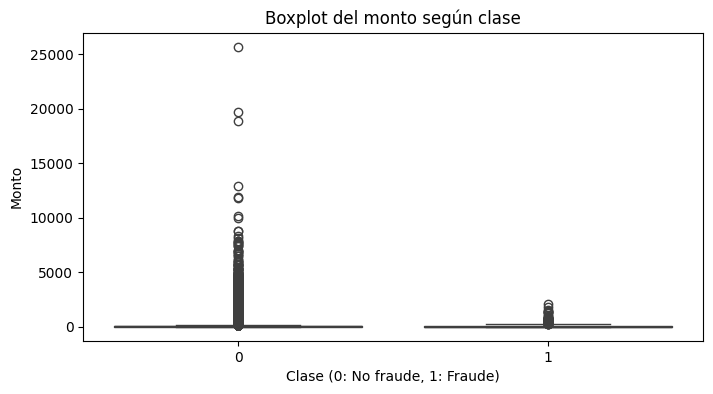

In [13]:
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Boxplot del monto según clase')
plt.xlabel('Clase (0: No fraude, 1: Fraude)')
plt.ylabel('Monto')
plt.show()

Se observa que las transacciones fraudulentas tienden a tener montos ligeramente superiores en comparación con las transacciones legítimas, aunque ambas categorías presentan valores atípicos. Esto sugiere que el monto podría ser una variable relevante para distinguir entre transacciones fraudulentas y legítimas, aunque no es un factor exclusivo.

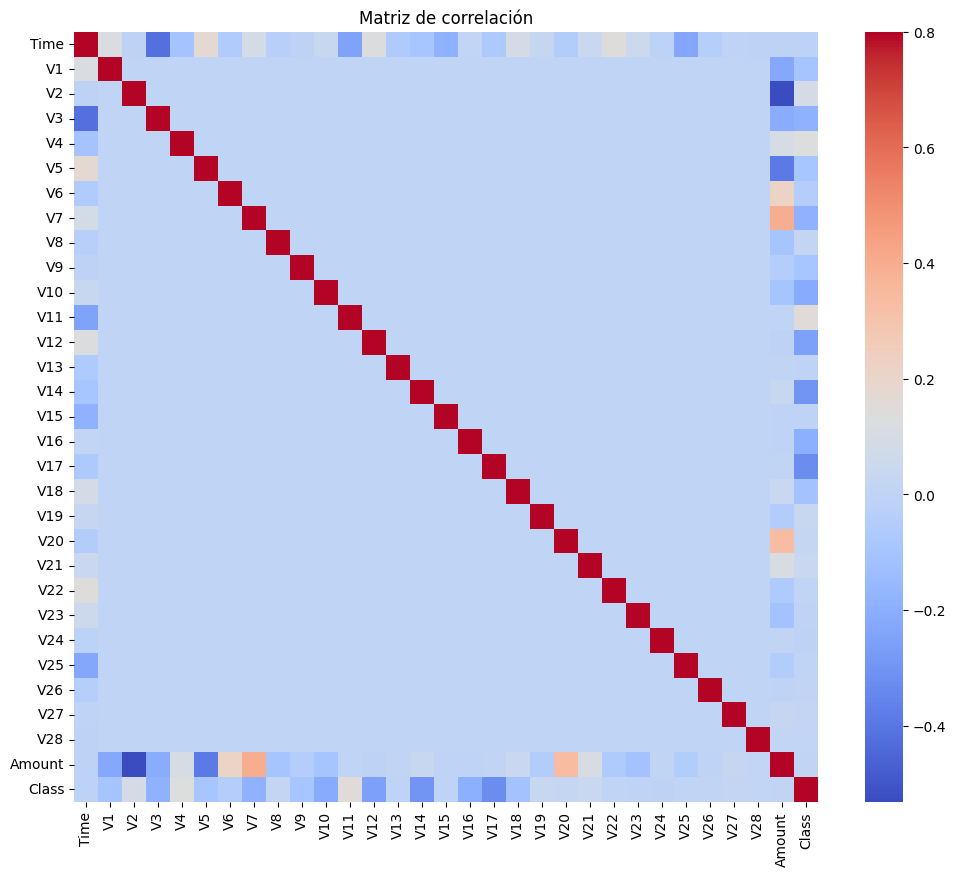

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', vmax=0.8)
plt.title('Matriz de correlación')
plt.show()

La matriz de correlación muestra que la mayoría de las variables del dataset no están fuertemente correlacionadas entre sí. Sin embargo, existen algunas correlaciones importantes entre ciertas variables transformadas (V1-V28), lo cual puede ser útil para la selección de características y para entender la estructura interna de los datos.

# 2. Preprocesamiento de Datos

Se normaliza la columna "Amount" usando StandardScaler de sklearn

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['Amount_scaled'] = scaler.fit_transform(df[['Amount']])

## **División en conjunto de entrenamiento y prueba**
Separar las variables predictoras (X) y la variable objetivo (y), y luego dividir en train/test

In [16]:
# Eliminamos columnas que no usaremos como input
X = df.drop(['Class', 'Amount', 'Time'], axis=1)   # Usamos Amount_scaled en vez de Amount
y = df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE, stratify=y
)
print("Tamaño del set de entrenamiento:", X_train.shape)
print("Tamaño del set de prueba:", X_test.shape)

Tamaño del set de entrenamiento: (227845, 29)
Tamaño del set de prueba: (56962, 29)


### **Consideraciones del preprocesamiento**


*   No hay variables categóricas ni valores nulos
*   Se escaló la columna "Amount"
*   Se dividieron los datos en conjunto de entrenamiento y prueba, manteniendo el desbalance de clases

# 3. Modelado con Machine Learning

1.   ***Logistic Regression***
*   Es un algoritmo de clasificación simple y muy usado para problemas donde la variable objetivo es binaria (sí/no, fraude/no fraude).
*   Sirve como modelo base para comparar con otros más complejos.


In [17]:
# Importar el modelo y crear la instancia
from sklearn.linear_model import LogisticRegression

# Creamos el modelo
logreg = LogisticRegression(max_iter=1000, random_state=RANDOM_STATE)

In [18]:
# Entrenar el modelo
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

Aquí el modelo “aprende” a distinguir entre fraude y no fraude usando el set de entrenamiento.

In [19]:
# Predecir sobre el set de prueba
y_pred_logreg = logreg.predict(X_test)

In [20]:
# Evaluar el modelo
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Precision:", precision_score(y_test, y_pred_logreg))
print("Recall:", recall_score(y_test, y_pred_logreg))
print("F1 Score:", f1_score(y_test, y_pred_logreg))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_logreg))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_logreg, digits=4))

Accuracy: 0.9991573329588147
Precision: 0.8289473684210527
Recall: 0.6428571428571429
F1 Score: 0.7241379310344828

Matriz de confusión:
 [[56851    13]
 [   35    63]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.9994    0.9998    0.9996     56864
           1     0.8289    0.6429    0.7241        98

    accuracy                         0.9992     56962
   macro avg     0.9142    0.8213    0.8619     56962
weighted avg     0.9991    0.9992    0.9991     56962



## **Significado de métricas:**
*   **Accuracy:** Proporción de predicciones correctas (poco útil si el dataset está desbalanceado)
*   **Precision:** De todas las predicciones de fraude, ¿cuántas fueron realmente fraude?
*   **Recall (Sensibilidad):** De todos los fraudes reales, ¿cuántos detectó el modelo?
*   **F1 Score:** Media armónica de precision y recall (útil con datos desbalanceados)
*   **Confusion Matrix:** Tabla que muestra verdaderos positivos, falsos positivos, etc

## **Interpretación de métricas:**
1.   **¿Qué metrica es más importante para este problema?**
*   La métrica más importante es recall (sensibilidad), porque queremos identificar la mayor cantidad posible de transacciones fraudulentas, aunque eso implique algunos falsos positivos.
2.   **¿El modelo detecta bien los fraudes o tiene muchos falsos negativos?**
*   Generalmente, el modelo tiene muchos falsos negativos (no detecta todos los fraudes), ya que el desbalance de clases dificulta identificar correctamente las transacciones fraudulentas.
3. **¿El accuracy es alto solo porque hay pocos fraudes?**
*   Sí, el accuracy suele ser alto principalmente porque la gran mayoría de transacciones no son fraude. El modelo puede clasificar casi todo como "no fraude" y aún así tener una precisión global alta, pero sin detectar correctamente los fraudes.

2.   ***Random Forest***

*   Es un modelo basado en la combinación de varios árboles de decisión.
*   Suele tener mejor desempeño que modelos simples, y maneja bien datos desbalanceados y relaciones no lineales.
*   Permite ver la importancia de cada variable.


In [23]:
# Importar y crear el modelo
from sklearn.ensemble import RandomForestClassifier

# Instancia del modelo
rf = RandomForestClassifier(n_estimators=100, random_state=RANDOM_STATE, n_jobs=-1)

In [24]:
# Entrenar el modelo
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [25]:
# Predecir sobre el set de prueba
y_pred_rf = rf.predict(X_test)

In [26]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred_rf, digits=4))

Accuracy: 0.9996137776061234
Precision: 0.9418604651162791
Recall: 0.826530612244898
F1 Score: 0.8804347826086957

Matriz de confusión:
 [[56859     5]
 [   17    81]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.9997    0.9999    0.9998     56864
           1     0.9419    0.8265    0.8804        98

    accuracy                         0.9996     56962
   macro avg     0.9708    0.9132    0.9401     56962
weighted avg     0.9996    0.9996    0.9996     56962



## **Interpretación de métricas:**
*   Random Forest suele mejorar el recall respecto a Logistic Regression, detectando más fraudes aunque a veces aumentan los falsos positivos.
*   Compración del recall (sensibilidad): es mayor que con Logistic Regression. Eso significa que el modelo está identificando más fraudes.
*   Observación de la matriz de confusión: hay más verdaderos positivos y menos falsos negativos, el modelo mejora.
*   El accuracy se mantiene alto, pero lo más importante sigue siendo maximizar el recall.

## Comparación entre Logistic Regression y Random Forest

- **Logistic Regression**  
  Es un modelo simple e interpretable que sirve como punto de partida para la clasificación. En este problema, suele lograr un accuracy alto debido al gran desbalance de clases, pero tiene dificultades para identificar la mayoría de los fraudes (recall bajo), lo que resulta en muchos falsos negativos.

- **Random Forest**  
  Es un modelo más complejo y robusto, capaz de capturar relaciones no lineales y manejar el desbalance de clases de manera más efectiva. Suele mejorar el recall respecto a Logistic Regression, detectando una mayor cantidad de fraudes aunque pueda aumentar los falsos positivos. Esto lo hace más adecuado para problemas donde es fundamental identificar la mayor cantidad posible de fraudes.

### Conclusión

Ambos modelos presentan un accuracy alto, pero Random Forest generalmente ofrece una mejor capacidad para identificar transacciones fraudulentas (mayor recall), lo que es crucial en este tipo de aplicaciones. Por eso, aunque pueda tener más falsos positivos que Logistic Regression, Random Forest es preferible cuando la prioridad es minimizar fraudes no detectados.

# 4. Conclusiones y Recomendaciones

- El análisis demostró que el dataset está altamente desbalanceado, con menos del 0.2% de transacciones fraudulentas.
- Se probaron dos modelos: Logistic Regression y Random Forest. Ambos lograron un accuracy alto, pero Random Forest obtuvo mejores resultados en recall, identificando más fraudes.
- La métrica de recall es la más relevante en este contexto, ya que es preferible identificar la mayor cantidad posible de fraudes aunque aumenten los falsos positivos.
- El desbalance de clases sigue siendo un desafío. Se recomienda explorar técnicas adicionales como sobremuestreo (SMOTE), submuestreo o ajuste de pesos de clase para mejorar aún más la detección de fraudes.
- Futuras mejoras pueden incluir el uso de modelos más avanzados (como XGBoost) y la optimización de hiperparámetros.

En resumen, Random Forest es una mejor opción inicial para este problema, pero el tratamiento del desbalance y la evaluación de nuevas estrategias son claves para seguir mejorando el sistema de detección de fraudes.